In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from simulation import *
from source import *
from aux_observation import *
from true_data import *

In [2]:
filename_gamma = './dl2_gamma-diffuse_testing.h5'
filename_proton = './dl2_proton_testing.h5'

In [3]:
sim = simulation_object(filename_gamma, filename_proton)

In [4]:
src = source_object()

In [5]:
obs = observation(sim, src)

## Spatial Weights

In [6]:
src_disk = source_object(shape="disk")
src_gauss = source_object(shape="gauss")
src_ring = source_object(rmin=0.5*u.deg)

obs_disk = observation(sim, src_disk)
obs_gauss = observation(sim, src_gauss)
obs_ring = observation(sim, src_ring)

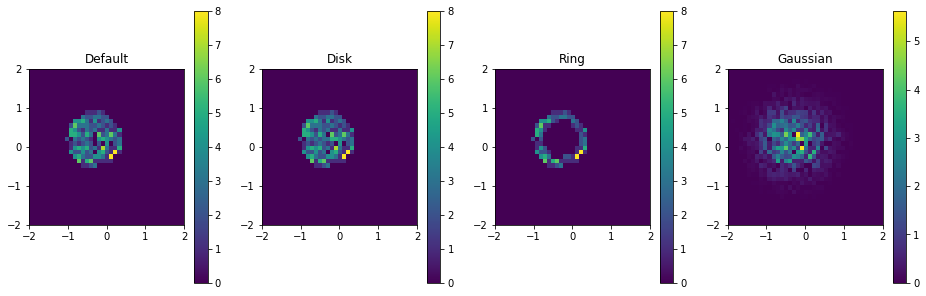

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(141, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Default')
plt.colorbar();

plt.subplot(142, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_disk.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Disk')
plt.colorbar();

plt.subplot(143, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_ring.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Ring')
plt.colorbar();

plt.subplot(144, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_gauss.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Gaussian')
plt.colorbar();

## Final Weight

In [8]:
binning = [0.01, 0.01547327, 0.023942209, 0.037046426, 0.057322935, 0.088697325, 0.13724377, 0.21236099, 
        0.32859189, 0.5084391, 0.78672155, 1.2173155, 1.8835851, 2.9145222, 4.5097188, 6.9780098, 10.797263, 16.706896, 
        25.851032, 40]
src_cutoff = source_object(spectrum_parameters = src.cutoff_spectrum_parameters) 
src_powerlaw = source_object(spectrum_parameters = src.powerlaw_spectrum_parameters)
obs_disk = observation(sim, src_disk)
obs_ring = observation(sim, src_ring)
obs_gauss = observation(sim, src_gauss)
obs_cutoff = observation(sim, src_cutoff)
obs_powerlaw = observation(sim, src_powerlaw)

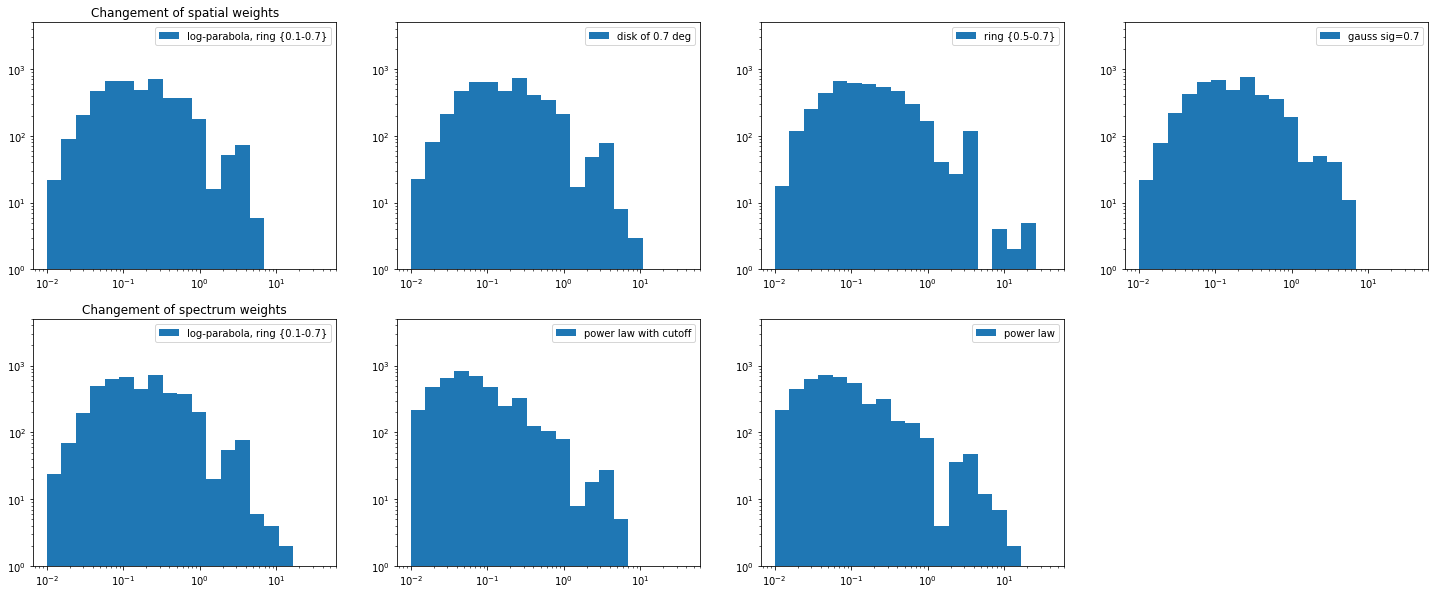

In [9]:
plt.figure(figsize=(25, 10))

plt.subplot(241)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.legend()
plt.ylim(1, 5000)
plt.title('Changement of spatial weights');

plt.subplot(242)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_disk.final_sim()['mc_energy'],
    bins= binning,
    label="disk of 0.7 deg"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(243)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_ring.final_sim()['mc_energy'],
    bins= binning,
    label="ring {0.5-0.7}"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(244)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_gauss.final_sim()['mc_energy'],
    bins= binning,
    label="gauss sig=0.7"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(245)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.ylim(1, 5000)
plt.legend()
plt.title('Changement of spectrum weights');

plt.subplot(246)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_cutoff.final_sim()['mc_energy'],
    bins= binning,
    label="power law with cutoff"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(247)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_powerlaw.final_sim()['mc_energy'],
    bins= binning,
    label="power law"
)
plt.ylim(1, 5000)
plt.legend();



[2967 2968 2971]


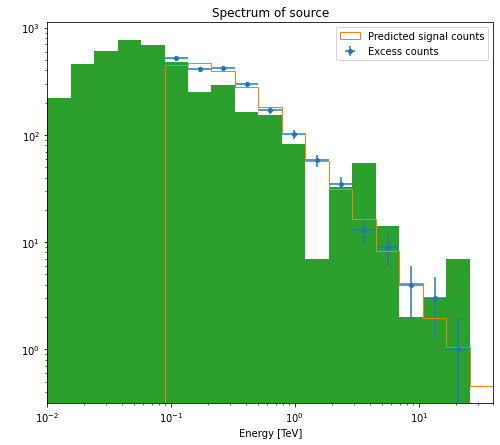

In [14]:
true = spectrum_data()
true.dataset

plt.hist(
    obs_powerlaw.final_sim()['mc_energy'],
    bins= true.binning,
    label="power law"
);



### Data Frame of simulation data and background

In [15]:
obs.final_sim(write=True)
filename = './simulation.h5'
data = pd.read_hdf(filename, key='dl2/event/telescope/parameters/LST_LSTCam')
data

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
919,1002,186208,331.248503,2.520154,-0.192525,-0.075257,0.206711,-2.768960,0.224564,0.006919,...,-0.169732,0.411097,4.361787,-0.001455,1.215377,3.183795,0,0.590167,7.154650e-06,1.652663e+09
962,1002,450103,56.280684,1.750359,-0.111618,-0.228132,0.253974,-2.025822,0.061216,0.004177,...,0.008329,0.051422,9.383454,0.208017,1.222023,3.146967,101,0.393167,1.666961e-04,1.652663e+09
3564,1016,424909,485.952162,2.686594,0.691124,-0.160724,0.709567,-0.228494,0.571281,0.014449,...,-0.265735,-0.135891,12.264606,-0.111440,1.212208,3.127764,0,0.866667,1.035920e-04,1.652663e+09
3604,1016,645700,200.850022,2.302872,0.213108,-0.196828,0.290097,-0.745707,0.369297,0.010074,...,-0.305607,0.322200,8.952071,0.066970,1.210639,3.174248,0,0.549750,3.165351e-05,1.652663e+09
2845,1012,1397607,101.081908,2.004673,0.136833,0.747277,0.759702,1.389694,0.161902,0.008164,...,-0.110617,-0.118904,14.895763,-0.171558,1.217755,3.129310,0,0.753167,4.063939e-05,1.652663e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,1008,805705,224.230077,2.350694,-0.735722,-0.112096,0.744212,-2.990394,0.198771,0.005532,...,-0.260563,0.084871,7.047336,0.139518,1.212412,3.150234,0,0.609000,1.743997e-04,1.652664e+09
2641,1012,181602,667.731749,2.824602,-0.271092,0.549290,0.612544,2.029255,0.140052,0.004695,...,-0.214430,0.297904,-2.358423,0.740536,1.213920,3.172051,0,0.666000,3.786742e-04,1.652664e+09
2586,1008,4865508,329.166026,2.517415,-0.104153,0.453719,0.465520,1.796441,0.127260,0.006030,...,-0.311843,0.236384,0.495305,1.118200,1.210498,3.165539,101,0.332333,5.671055e-05,1.652664e+09
1597,1002,4055006,670.467606,2.826378,0.139362,-0.724472,0.737754,-1.380754,0.399012,0.009668,...,-0.419947,-0.084138,11.121369,0.463575,1.206720,3.133155,0,0.918333,7.671155e-05,1.652664e+09


In [16]:
obs.final_background_sim(write=True)
name = './background.h5'
background = pd.read_hdf(name, key='dl2/event/telescope/parameters/LST_LSTCam')
background

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
448,1014,9312101,566.232470,2.752995,-0.188764,0.719121,0.743482,1.827498,0.303099,0.006700,...,-0.468109,0.250092,1.868456,0.779310,1.204908,3.166556,101,0.024167,6.766935e-07,1.652663e+09
126,1003,5227306,86.254799,1.935783,0.319750,0.377059,0.494382,0.867459,0.106318,0.006122,...,-0.039461,0.463224,6.909398,0.252808,1.219947,3.189744,0,0.606333,1.029022e-04,1.652663e+09
246,1014,1164807,214.101959,2.330621,0.491440,-0.902590,1.027707,-1.072203,0.123044,0.004067,...,0.162887,-1.016201,3.594053,-0.107496,1.225714,3.034123,0,0.564500,5.551864e-05,1.652663e+09
133,1003,5492508,1906.422588,3.280219,0.345738,0.959648,1.020029,1.224996,0.251437,0.003720,...,-0.279348,1.091482,3.215724,0.468612,1.209728,3.252128,101,0.110667,8.654050e-05,1.652663e+09
448,1014,9312101,566.232470,2.752995,-0.188764,0.719121,0.743482,1.827498,0.303099,0.006700,...,-0.468109,0.250092,1.868456,0.779310,1.204908,3.166556,101,0.024167,1.581585e-04,1.652663e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1003,8964102,33.563386,1.525866,-0.752033,0.684228,1.016721,2.403369,0.075791,0.005512,...,-0.396772,1.231932,0.007654,0.521675,1.205009,3.264859,101,0.426000,4.684280e-05,1.652664e+09
375,1014,5736902,56.312765,1.750607,-0.720285,-0.755901,1.044125,-2.332072,0.096156,0.006686,...,-1.289696,-0.499863,2.967826,0.424213,1.175281,3.095292,101,0.374000,4.187145e-05,1.652664e+09
245,1014,1141104,44.270470,1.646114,-0.224549,-0.973069,0.998641,-1.797590,0.073756,0.004041,...,-0.001772,-0.638258,-0.602115,0.057157,1.220954,3.075043,101,0.353659,1.815306e-05,1.652664e+09
209,1003,9439700,101.299725,2.005608,-0.464607,0.374013,0.596444,2.463805,0.108258,0.005021,...,-0.531923,0.709337,1.455214,0.206768,1.201896,3.211886,101,0.174500,2.008717e-04,1.652664e+09


In [17]:
obs.total(write=True)
name = './dl2_LST-1.Run99999.h5'
total = pd.read_hdf(name, key='dl2/event/telescope/parameters/LST_LSTCam')
total

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
3,1001,24006,5026.379845,3.701255,-0.463672,-0.082358,0.470930,-2.965806,0.322249,0.003555,...,-0.024456,-0.103308,3.336248,0.897594,1.220838,3.130831,0,0.870000,0.000043,1.652663e+09
4,1003,291900,180.659358,2.256860,0.548346,-0.556637,0.781363,-0.792901,0.127330,0.004403,...,0.281665,-0.739014,2.800619,-0.056750,1.230807,3.062377,101,0.248000,0.000012,1.652663e+09
249,1014,1246705,67.234441,1.827592,-0.473442,-0.536304,0.715380,-2.294019,0.090979,0.004642,...,-0.795269,-0.349557,-0.178073,0.103464,1.193129,3.107746,101,0.436667,0.000014,1.652663e+09
286,1014,2578107,142.705494,2.154441,0.902263,-0.474548,1.019448,-0.484194,0.130104,0.005317,...,0.970269,-0.094009,5.249552,-0.274660,1.256366,3.130743,0,0.605833,0.000044,1.652663e+09
223,1014,55405,90.716347,1.957686,1.058317,-0.259790,1.089737,-0.240715,0.095705,0.005034,...,0.849272,-0.489069,-2.632683,-0.097079,1.251605,3.085930,101,0.397083,0.000162,1.652663e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,1025,2850200,506.145300,2.704275,-0.205656,-0.071203,0.217634,-2.808287,0.228761,0.006326,...,0.035652,0.155248,-0.219225,0.483826,1.222961,3.157860,101,0.342048,0.000004,1.652664e+09
218,1003,9893808,244.390244,2.388084,0.531330,-0.408502,0.670213,-0.655442,0.122063,0.004022,...,0.158297,-0.455130,5.218180,0.250379,1.227015,3.093351,101,0.473667,0.000085,1.652664e+09
372,1014,5641509,215.617883,2.333685,0.524945,0.171476,0.552243,0.315729,0.080805,0.003182,...,0.364690,0.381828,-4.730990,0.591534,1.234490,3.182923,101,0.260167,0.000035,1.652664e+09
3328,1012,4083500,147.876870,2.169900,0.516436,0.562406,0.763549,0.827982,0.212110,0.008503,...,-0.352040,0.184243,13.852438,-0.524068,1.209100,3.160187,0,0.695000,0.000005,1.652664e+09


### Calcul 

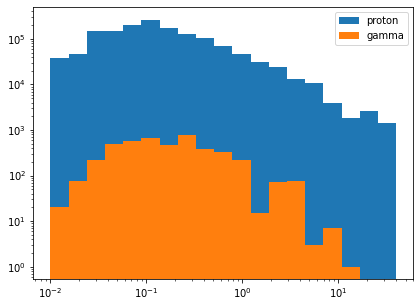

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy_proton.value,
    bins= binning,
    weights = obs.background_weighting(),
    label="proton"
)
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="gamma"
)
plt.legend();

Center
-0.3091500098520138 deg
0.20483987143168217 deg
0.35627983721152445 deg
Gaussian
-0.3333058493713621
0.1894001242049703
0.7087515405933312
0.6801353160010989
Disk
-0.34968651091577735
0.17266822271443627
0.34753327652043825
0.3480070564191047
Ring
-0.4130052404349372
0.1656121366455821
0.414257821835591
0.4280583672457525


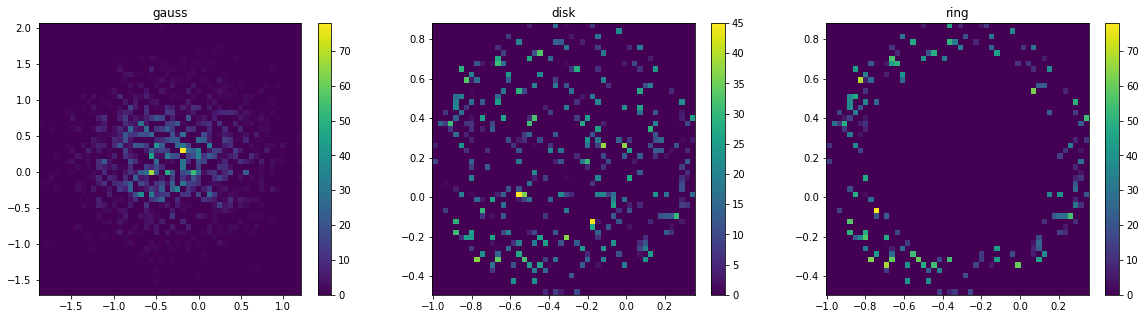

In [19]:
gaussian_data = obs_gauss.final_sim()
disk_data =obs_disk.final_sim()
ring_data = obs_ring.final_sim()




plt.figure(figsize=(20, 5))

f=27 * u.m 
x_gauss = (gaussian_data['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_gauss = (gaussian_data['reco_src_y'].to_numpy() * u.m / f) * u.rad  

x_disk = (disk_data['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_disk = (disk_data['reco_src_y'].to_numpy() * u.m / f) * u.rad  

x_ring = (ring_data ['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_ring = (ring_data ['reco_src_y'].to_numpy() * u.m / f) * u.rad  

print("Center")
print(obs.center_camera()[0] *u.deg)
print(obs.center_camera()[1] *u.deg)



print(x_disk.max().to('deg'))

print("Gaussian")

print(x_gauss.to('deg').value.mean())
print(y_gauss.to('deg').value.mean())
print(np.sqrt(x_gauss.to('deg').value.var())*1.5)
print(np.sqrt(y_gauss.to('deg').value.var())*1.5)

plt.subplot(131)
plt.hist2d(
    x_gauss.to('deg').value,
    y_gauss.to('deg').value,
    bins=50,
)
plt.title("gauss")
plt.colorbar()
#plt.xlim(-1,1)
#plt.ylim(-1,1);

print("Disk")

print(x_disk.to('deg').value.mean())
print(y_disk.to('deg').value.mean())
print(np.sqrt(x_disk.to('deg').value.var()))
print(np.sqrt(y_disk.to('deg').value.var()))

plt.subplot(132)
plt.hist2d(
    x_disk.to('deg').value,
    y_disk.to('deg').value,
    bins=50,
)
plt.title("disk")
plt.colorbar();
#plt.xlim(-1,1)
#plt.ylim(-1,1)

print("Ring")

print(x_ring.to('deg').value.mean())
print(y_ring.to('deg').value.mean())
print(np.sqrt(x_ring.to('deg').value.var()))
print(np.sqrt(y_ring.to('deg').value.var()))

plt.subplot(133)
plt.hist2d(
    x_ring.to('deg').value,
    y_ring.to('deg').value,
    bins=50,
)
plt.title("ring")
plt.colorbar()
#plt.xlim(-1,1)
#plt.ylim(-1,1);

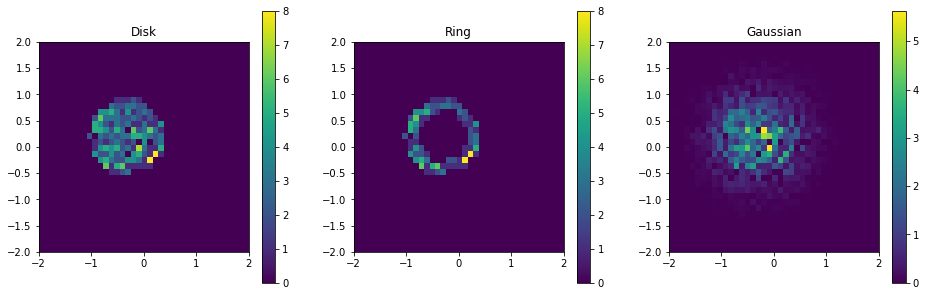

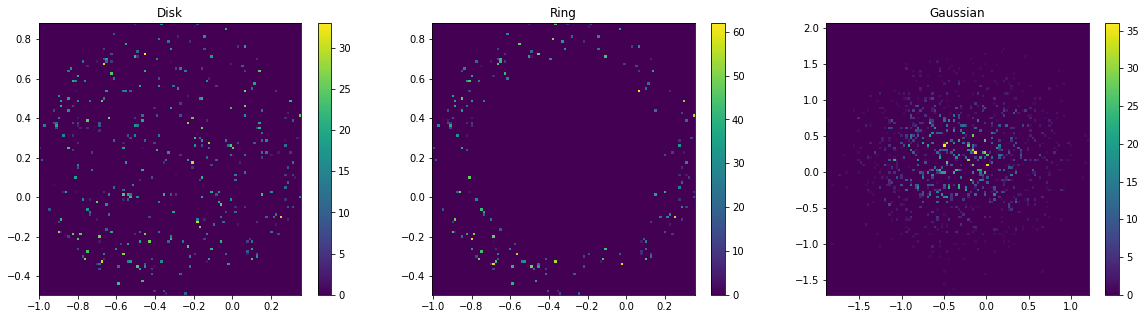

In [22]:
f=27 * u.m 
x_gauss = (gaussian_data['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_gauss = (gaussian_data['reco_src_y'].to_numpy() * u.m / f) * u.rad  

x_disk = (disk_data['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_disk = (disk_data['reco_src_y'].to_numpy() * u.m / f) * u.rad  

x_ring = (ring_data ['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_ring = (ring_data ['reco_src_y'].to_numpy() * u.m / f) * u.rad  




plt.figure(figsize=(16, 5))

plt.subplot(131, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_disk.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Disk')
plt.colorbar();

plt.subplot(132, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_ring.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Ring')
plt.colorbar();

plt.subplot(133, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_gauss.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Gaussian')
plt.colorbar();

plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.hist2d(
    x_disk.to('deg').value,
    y_disk.to('deg').value,
    bins=110,
)
plt.title("Disk")
plt.colorbar();
#plt.xlim(-2,2)
#plt.ylim(-2,2);

plt.subplot(132)
plt.hist2d(
    x_ring.to('deg').value,
    y_ring.to('deg').value,
    bins=110,
)
plt.title("Ring")
plt.colorbar();
#plt.xlim(-2,2)
#plt.ylim(-2,2);

plt.subplot(133)
plt.hist2d(
    x_gauss.to('deg').value,
    y_gauss.to('deg').value,
    bins=110,
)
plt.title("Gaussian")
plt.colorbar();
#plt.xlim(-2,2)
#plt.ylim(-2,2);


